- multiplication-time-break-down
    - x축
        - 우측 행렬의 density
    - y축
        - 왼쪽 행렬 고정한 뒤, 우측 행렬 density 증가에 따른 곱셈 성능

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:78: UserWarning: FixedFormatter should only be used together with FixedLocator


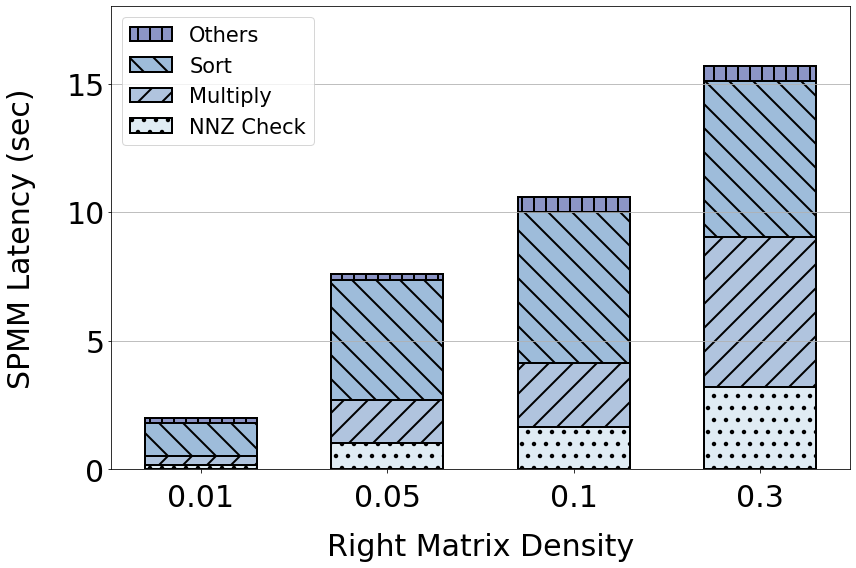

In [34]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

r_sm_density = ["0.01", "0.05", "0.1", "0.3"]

smsm_nnz_check = [158, 1039, 1653, 3213]

smsm_multi= [363, 1652, 2485, 5838]

smsm_nnz_check_multi = np.array(smsm_nnz_check) + np.array(smsm_multi)

smsm_sort = [1294, 4683, 5859, 6036]

####

smdm_todense = [1488, 1819, 1847, 2242]

smdm_multi = [6377, 6536, 6401, 6968]

################################# ax1 좌측 y ####################################################

# r_sm 의 density에 따른 sm * sm latency
sm_sm_latency = [1980, 7605, 10580, 15693]
sm_sm_min_latency = [1543, 7136, 9391, 14768]
sm_sm_max_latency = [2059, 7838, 11672, 16950]
df = pd.DataFrame({'r_sm_density':r_sm_density,'sm_sm_latency':sm_sm_latency, 'sm_sm_min_latency': sm_sm_min_latency, 'sm_sm_max_latency': sm_sm_max_latency}) 

# 평균과 최소, 최대 간의 차이
df['mingap'] = df.sm_sm_latency - df.sm_sm_min_latency
df['maxgap'] = df.sm_sm_max_latency - df.sm_sm_latency
yerr_sm_sm = df[['mingap', 'maxgap']].T.to_numpy()

# r_sm 의 density에 따른 sm * dm latency 
sm_dm_latency = [8559.22, 9135.28, 9193.32, 9365]
sm_dm_min_latency = [8229, 8127, 8307, 8390]
sm_dm_max_latency = [10690, 11101, 11125, 11102]
df = pd.DataFrame({'r_sm_density':r_sm_density,'sm_dm_latency':sm_dm_latency, 'sm_dm_min_latency': sm_dm_min_latency, 'sm_dm_max_latency': sm_dm_max_latency}) 

# 평균과 최소, 최대 간의 차이
df['mingap'] = df.sm_dm_latency - df.sm_dm_min_latency
df['maxgap'] = df.sm_dm_max_latency - df.sm_dm_latency
yerr_sm_dm = df[['mingap', 'maxgap']].T.to_numpy()

################################# x축 및 전체 figure 설정 ####################################################

fontsize = 30

plt.rc('axes', labelsize=fontsize)   # x,y축 label 폰트 크기
plt.rc('xtick', labelsize=fontsize)  # x축 눈금 폰트 크기 
plt.rc('ytick', labelsize=fontsize)  # y축 눈금 폰트 크기
plt.rc('legend', fontsize=fontsize*0.7)  # 범례 폰트 크기
plt.rcParams['hatch.linewidth'] = 2 # bar pattern 두께

x = np.arange(len(r_sm_density)) # x축 인덱스
width = 0.6 # bar 넓이

fig, ax1 = plt.subplots(figsize=(12,8)) # figure 및 subplot 선언

# 각 bar 의 중심 지정
bar1 = ax1.bar(x, sm_sm_latency, width, linewidth=2, edgecolor='black',  hatch='|', label='Others', color='#8C95C6', capsize=20)
bar2 = ax1.bar(x, smsm_sort, width, linewidth=2, edgecolor='black', hatch='\\', label='Sort', color='#9EBCDA', capsize=20, bottom=smsm_nnz_check_multi)   
bar3 = ax1.bar(x, smsm_multi, width, linewidth=2, edgecolor='black', hatch='/', label='Multiply', color='lightsteelblue', capsize=20, bottom=smsm_nnz_check) 
bar4 = ax1.bar(x, smsm_nnz_check, width, linewidth=2, edgecolor='black', hatch='.', label='NNZ Check', color='#E0ECF4', capsize=20,)    

# bar5 = ax1.bar(x + 0.15, sm_dm_latency, width, linewidth=2, edgecolor='black', hatch='/', label ='sm * dm Etc', color='#959595', capsize=20)
# bar6 = ax1.bar(x + 0.15, smdm_multi, width, linewidth=2, edgecolor='black', hatch='/', label='sm * dm Multiply', color='#BDBDBD', capsize=20, bottom=smdm_todense)
# bar7 = ax1.bar(x + 0.15, smdm_todense, width, linewidth=2, edgecolor='black', hatch='/', label='sm * dm To Dense', color='#D9D9D9', capsize=20)

################################# ax1 ####################################################

ax1.set_xticks(x) # x축 인덱스
ax1.set_xticklabels(r_sm_density) # x축 label 이름
ax1.tick_params(axis='x',pad=10) # x축 label pad

ax1.yaxis.grid(True) # y축만 grid 사용
ax1.set_ylim([0, 18000])  # 좌측 y축 범위 설정
ax1.set_yticklabels(["0","5","10","15"]) # x축 label 이름
ax1.set_xlabel('Right Matrix Density', labelpad=20) # ax1 ylabel 설정
ax1.set_ylabel('SPMM Latency (sec)', labelpad=30) # ax1 ylabel 설정

ax1.legend(loc="upper left") # 범례 표시

# 이미지 저장시, figure 크기에 맞게 이미지 저장
fig.tight_layout()
fig.savefig('./right-sparse-multiplication-time-break-down.png')
plt.show()

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:78: UserWarning: FixedFormatter should only be used together with FixedLocator


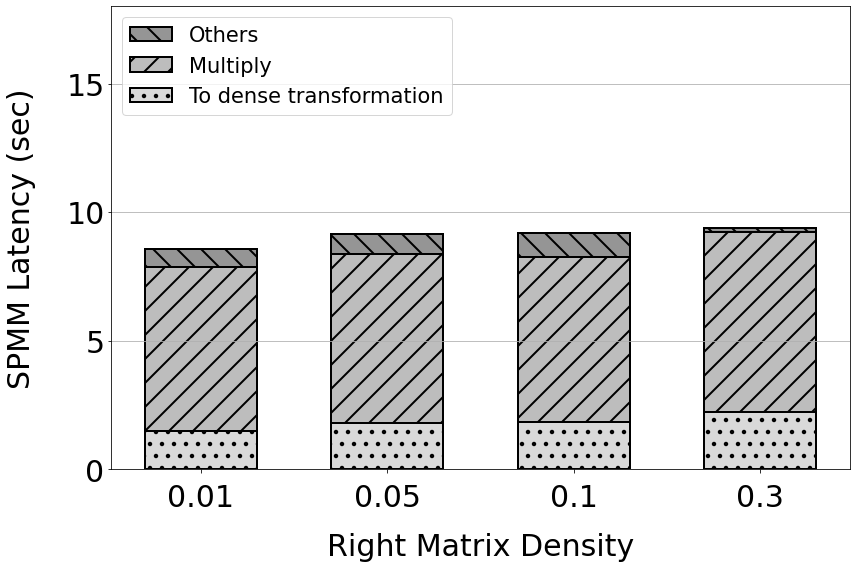

In [35]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

r_sm_density = ["0.01", "0.05", "0.1", "0.3"]

smsm_nnz_check = [158, 1039, 1653, 3213]

smsm_multi= [363, 1652, 2485, 5838]

smsm_nnz_check_multi = np.array(smsm_nnz_check) + np.array(smsm_multi)

smsm_sort = [1294, 4683, 5859, 6036]

####

smdm_todense = [1488, 1819, 1847, 2242]

smdm_multi = [6377, 6536, 6401, 6968]

################################# ax1 좌측 y ####################################################

# r_sm 의 density에 따른 sm * sm latency
sm_sm_latency = [1980, 7605, 10580, 15693]
sm_sm_min_latency = [1543, 7136, 9391, 14768]
sm_sm_max_latency = [2059, 7838, 11672, 16950]
df = pd.DataFrame({'r_sm_density':r_sm_density,'sm_sm_latency':sm_sm_latency, 'sm_sm_min_latency': sm_sm_min_latency, 'sm_sm_max_latency': sm_sm_max_latency}) 

# 평균과 최소, 최대 간의 차이
df['mingap'] = df.sm_sm_latency - df.sm_sm_min_latency
df['maxgap'] = df.sm_sm_max_latency - df.sm_sm_latency
yerr_sm_sm = df[['mingap', 'maxgap']].T.to_numpy()

# r_sm 의 density에 따른 sm * dm latency 
sm_dm_latency = [8559.22, 9135.28, 9193.32, 9365]
sm_dm_min_latency = [8229, 8127, 8307, 8390]
sm_dm_max_latency = [10690, 11101, 11125, 11102]
df = pd.DataFrame({'r_sm_density':r_sm_density,'sm_dm_latency':sm_dm_latency, 'sm_dm_min_latency': sm_dm_min_latency, 'sm_dm_max_latency': sm_dm_max_latency}) 

# 평균과 최소, 최대 간의 차이
df['mingap'] = df.sm_dm_latency - df.sm_dm_min_latency
df['maxgap'] = df.sm_dm_max_latency - df.sm_dm_latency
yerr_sm_dm = df[['mingap', 'maxgap']].T.to_numpy()

################################# x축 및 전체 figure 설정 ####################################################

fontsize = 30

plt.rc('axes', labelsize=fontsize)   # x,y축 label 폰트 크기
plt.rc('xtick', labelsize=fontsize)  # x축 눈금 폰트 크기 
plt.rc('ytick', labelsize=fontsize)  # y축 눈금 폰트 크기
plt.rc('legend', fontsize=fontsize*0.7)  # 범례 폰트 크기
plt.rcParams['hatch.linewidth'] = 2 # bar pattern 두께

x = np.arange(len(r_sm_density)) # x축 인덱스
width = 0.6 # bar 넓이

fig, ax1 = plt.subplots(figsize=(12,8)) # figure 및 subplot 선언

# 각 bar 의 중심 지정
# bar1 = ax1.bar(x, sm_sm_latency, width, linewidth=2, edgecolor='black', color='#8C95C6', label='Etc', hatch='.', capsize=20)
# bar2 = ax1.bar(x, smsm_sort, width, linewidth=2, edgecolor='black', hatch='.', label='Sort', color='#9EBCDA', capsize=20, bottom=smsm_nnz_check_multi)   
# bar3 = ax1.bar(x, smsm_multi, width, linewidth=2, edgecolor='black', hatch='.', label='Multiply', color='lightsteelblue', capsize=20, bottom=smsm_nnz_check) 
# bar4 = ax1.bar(x, smsm_nnz_check, width, linewidth=2, edgecolor='black', hatch='.', label='NNZ Check', color='#E0ECF4', capsize=20,)    

bar5 = ax1.bar(x, sm_dm_latency, width, linewidth=2, edgecolor='black', hatch='\\', label ='Others', color='#959595', capsize=20)
bar6 = ax1.bar(x, smdm_multi, width, linewidth=2, edgecolor='black', hatch='/', label='Multiply', color='#BDBDBD', capsize=20, bottom=smdm_todense)
bar7 = ax1.bar(x, smdm_todense, width, linewidth=2, edgecolor='black', hatch='.', label='To dense transformation', color='#D9D9D9', capsize=20)

################################# ax1 ####################################################

ax1.set_xticks(x) # x축 인덱스
ax1.set_xticklabels(r_sm_density) # x축 label 이름
ax1.tick_params(axis='x',pad=10) # x축 label pad

ax1.yaxis.grid(True) # y축만 grid 사용
ax1.set_ylim([0, 18000])  # 좌측 y축 범위 설정
ax1.set_yticklabels(["0","5","10","15"]) # x축 label 이름
ax1.set_xlabel('Right Matrix Density', labelpad=20) # ax1 ylabel 설정
ax1.set_ylabel('SPMM Latency (sec)', labelpad=30) # ax1 ylabel 설정

ax1.legend(loc="upper left") # 범례 표시


# 이미지 저장시, figure 크기에 맞게 이미지 저장
fig.tight_layout()
fig.savefig('./right-dense-multiplication-time-break-down.png')
plt.show()